### The Task is to generate a random price history of stock

Condition: 

We are given that the rate of price is a Normally Distributed with a Mean = 0 and Std. Deviation = 0.1

i.e.   (today'price  -  yesterday's price)  /  (yesterday's  price)   ~   ND (0,  0.1)

Starting Price i.e. on Day 1 is considered to be 1.0

Note: Discard the series if any price goes <=0 

#### There will be 100 trials on the price history

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class norm1:
    def __init__(self, a1, b1, c1):
        self.a1 = a1 # Mean
        self.b1 = b1 # SD
        self.c1 = c1 # Bins for a histogram - frequency of that interval
        
    def dist_curve(self):
        plt.plot(self.c1, 
                 1/(self.b1 * np.sqrt(2 * np.pi)) * np.exp( - (self.c1 - self.a1)**2 / (2 * self.b1**2) ),
                 linewidth=2,
                 color='r')
        plt.show()

C:\Users\janu\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


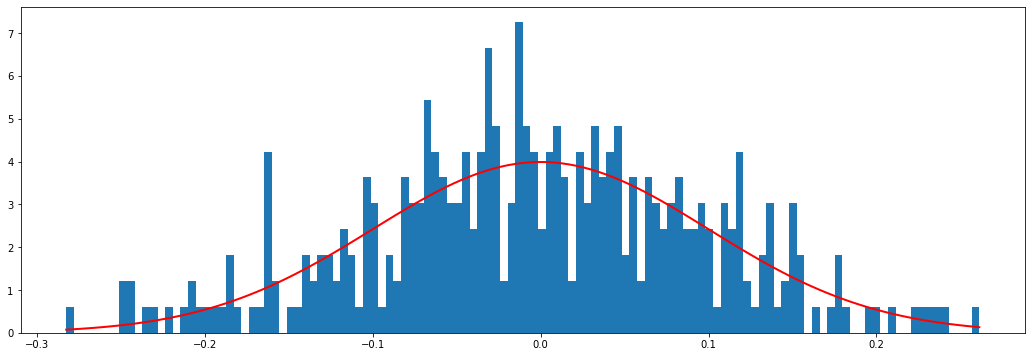

In [5]:
#Vary the mean and SD to generate different plots
mean1 = 0 #given
sd1 = 0.1 #given
no = 365 # number of days assumed

c = np.random.normal(loc = mean1, scale = sd1, size = no) # gives normal distribution values at random

# plot to see if the values belong to normal distribution
fig = plt.figure(figsize=(18,6))
n, bins, patches = plt.hist(c, 120, normed=True) #hist
hist1 = norm1(mean1, sd1, bins)
plot1 = hist1.dist_curve()

In [6]:
len(c), len(bins) # 365 values were grouped into 121 intervals

(365, 121)

Plot the values of Normal distribution themselves

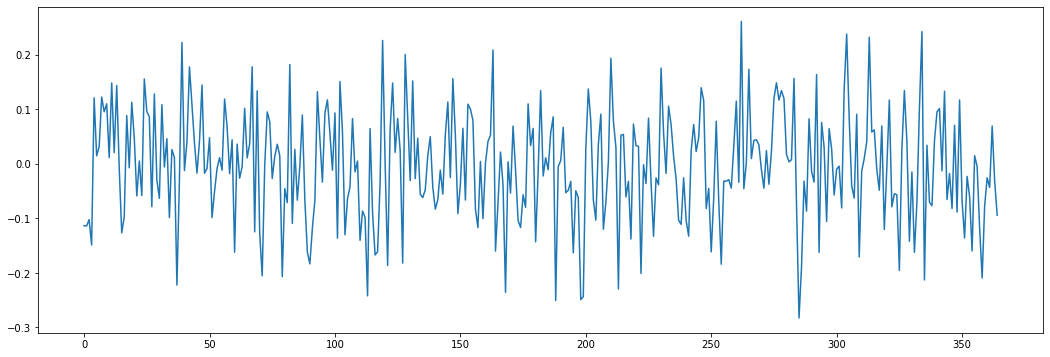

In [7]:
fig = plt.figure(figsize=(18,6))
plt.plot(range(0,len(c)),c)

In [8]:
min(c), max(c), len(c)

(-0.28254728216374864, 0.2612927396460218, 365)

In [9]:
c = np.round(c, 4)

In [10]:
min(c), max(c), len(c)

(-0.2825, 0.2613, 365)

TO count the number of zeroes in the list c

In [11]:
count = 0
for i in c:
    if i <= 0:
        count = count + 1
count

190

A list to store the generated prices

In [12]:
p = [1.0] * no

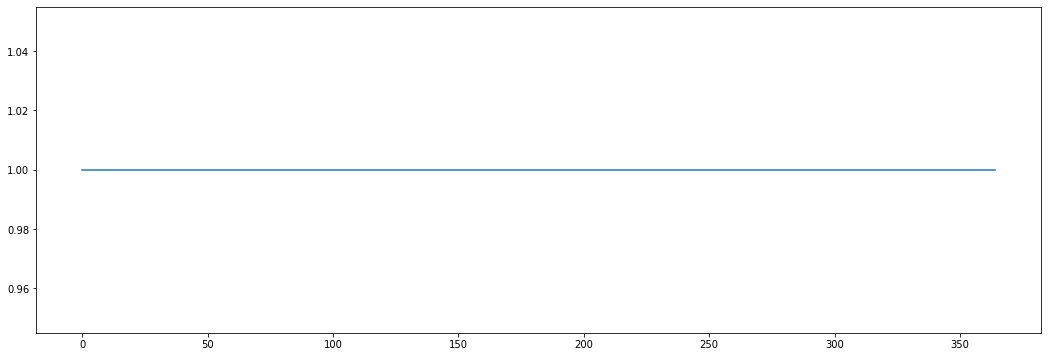

In [13]:
fig = plt.figure(figsize=(18,6))
plt.plot(range(0,len(p)), p)

#### Strategy:

Brute Force manner of generating the next days prices

In [14]:
for i in range(0, len(p)):
    if i == 0:
        p[i] = 1.0
    else:
        p[i] = (p[i-1] * c[i-1]) + p[i-1]

In [15]:
min(p), max(p)

(0.04233201427887371, 2.962304134249857)

In [16]:
p = np.round(p,4)

In [17]:
min(p), max(p)

(0.0423, 2.9623)

Plotting the generated prices

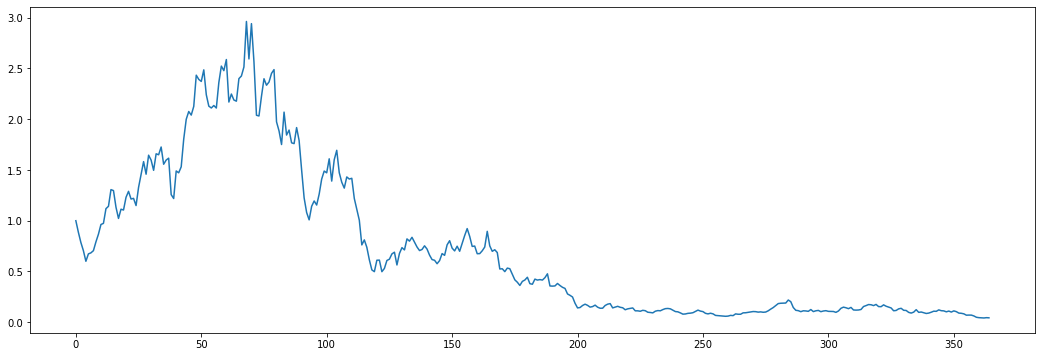

In [18]:
fig = plt.figure(figsize=(18,6))
plt.plot(range(0,len(p)), p)

#### Strategy:

Is to keep generating the rate random values such that the computed price is not amounted to zero or less

In [22]:
i = 0
c1 = [0]*no
p1 = [1.0]*no

In [23]:
while i!= no:
    
    c_value = float(
                    np.round(
                             np.random.normal(
                                              loc = mean1, 
                                              scale = sd1, 
                                              size = 1), 
                             2))
    
    if c_value != 0:
        if i == 0:
            p1[i] = 1.0
            c1[i] = c_value
            i = i+1
        else:
            price = float(
                          np.round((
                                    p1[i-1] * 
                                    c_value) + 
                                    p1[i-1], 2))
            if price > 0:
                p1[i] = price
                c1[i] = c_value
                i = i+1

In [24]:
min(c1), max(c1), len(c1)

(-0.27, 0.27, 365)

In [25]:
min(p1), max(p1), len(p1)

(0.02, 1.16, 365)

In [26]:
count = 0
for i in c1:
    if i <= 0:
        count = count + 1
count

190

In [27]:
count = 0
for i in p1:
    if i <= 0:
        count = count + 1
count

0

C:\Users\janu\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


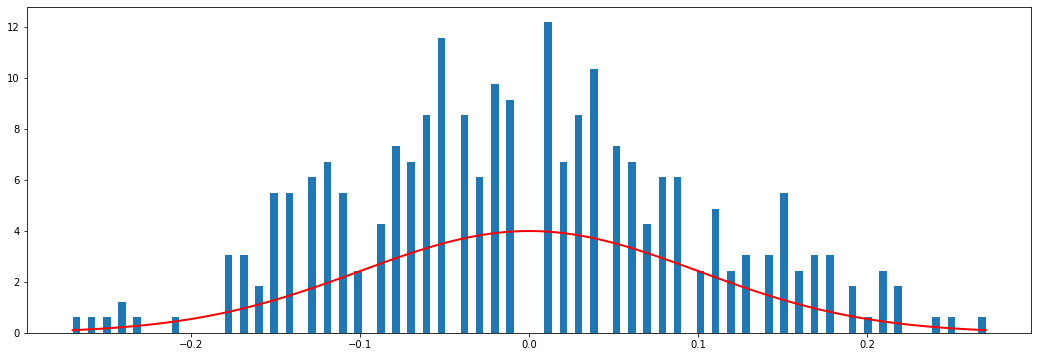

In [28]:
# plot to see if the values belong to normal distribution
fig = plt.figure(figsize=(18,6))
n, bins, patches = plt.hist(c1, 120, normed=True) #hist
hist1 = norm1(mean1, sd1, bins)
plot1 = hist1.dist_curve()

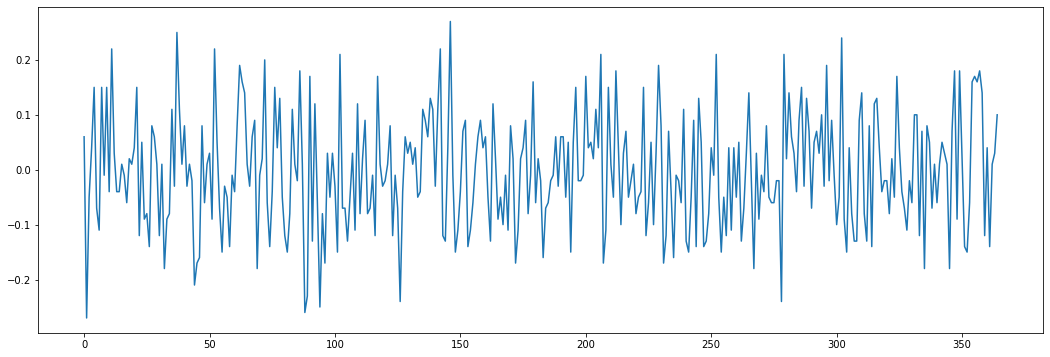

In [29]:
fig = plt.figure(figsize=(18,6))
plt.plot(range(0,len(c1)), c1)

Plotting the generated prices

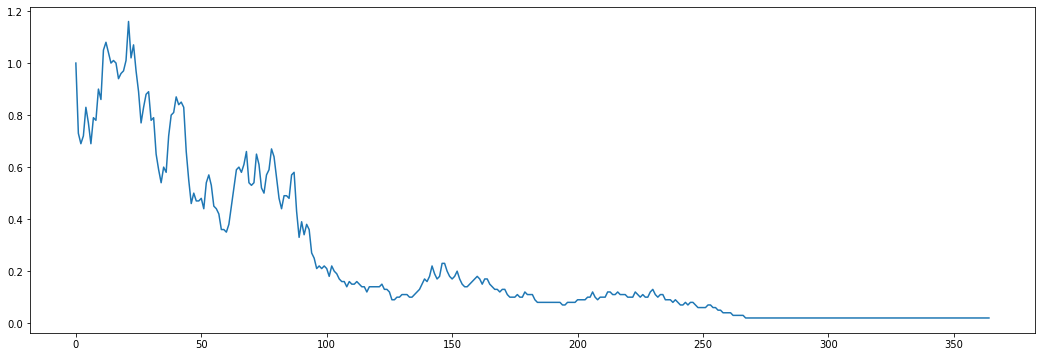

In [30]:
fig = plt.figure(figsize=(18,6))
plt.plot(range(0,len(p1)), p1)

### BOTH STRATEGIES SHOWED THE SHARP DECRESE IN PRICES
#### which is due to 2 small fractions multiplying to produce a much smaller fraction

### ______________________________________________________________________________________________

### Now to actually verify the above statement

##### Generate the graph for 3650 days

In [31]:
i = 0
c2 = [0]*(no*10)
p2 = [1.0]*(no*10)

In [32]:
while i!= (no*10):
    
    c_value = float(
                    np.round(
                             np.random.normal(
                                              loc = mean1, 
                                              scale = sd1, 
                                              size = 1), 
                             2))
    
    if c_value != 0:
        if i == 0:
            p2[i] = 1.0
            c2[i] = c_value
            i = i+1
        else:
            price = float(
                          np.round((
                                    p2[i-1] * 
                                    c_value) + 
                                    p2[i-1], 2))
            if price > 0:
                p2[i] = price
                c2[i] = c_value
                i = i+1

In [33]:
min(c2), max(c2), len(c2)

(-0.36, 0.35, 3650)

In [34]:
min(p2), max(p2), len(p2)

(0.01, 2.85, 3650)

In [35]:
count = 0
for i in c2:
    if i <= 0:
        count = count + 1
count

1817

In [36]:
count = 0
for i in p2:
    if i <= 0:
        count = count + 1
count

0

C:\Users\janu\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


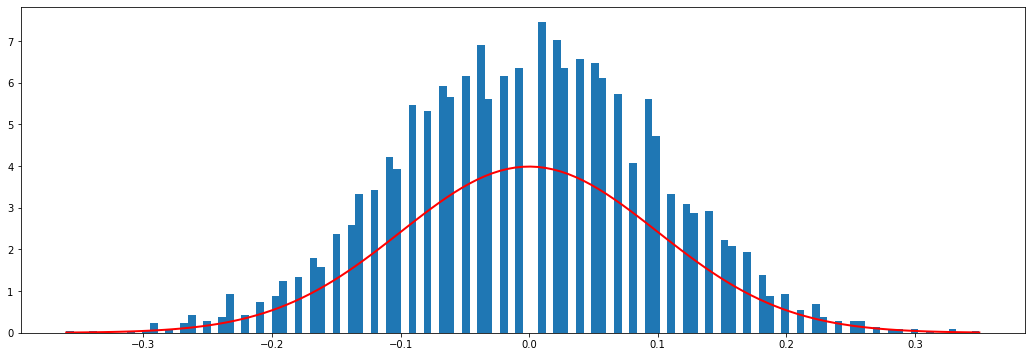

In [39]:
# plot to see if the values belong to normal distribution
fig = plt.figure(figsize=(18,6))
n, bins, patches = plt.hist(c2, 120, normed=True) #hist
hist1 = norm1(mean1, sd1, bins)
plot1 = hist1.dist_curve()

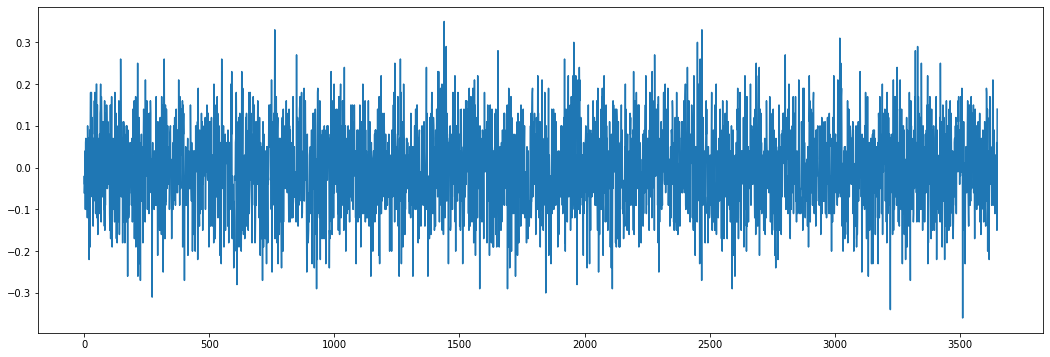

In [40]:
fig = plt.figure(figsize=(18,6))
plt.plot(range(0,len(c2)), c2)

Plotting the generated prices

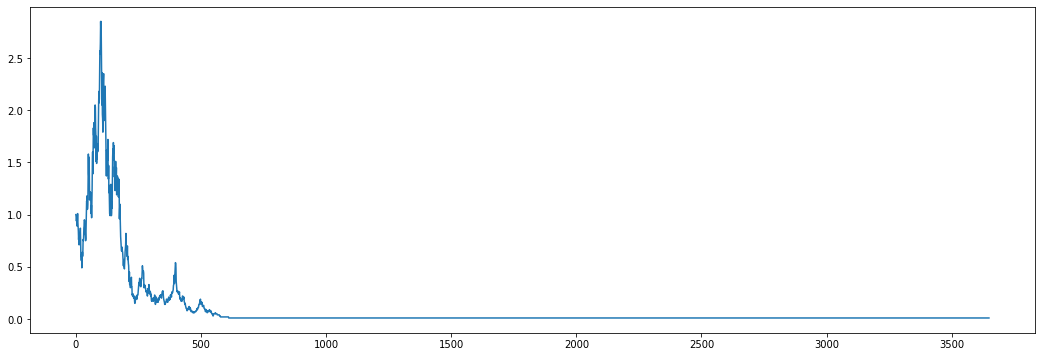

In [42]:
fig = plt.figure(figsize=(18,6))
plt.plot(range(0,len(p2)), p2)

## Is it possible to generate prices that do not continue to fall too steeply and still follow the task?